# Bridge Design Pattern

Cuando una abstracción tiene muchas implementaciones, la forma usual de acomodarlas es usando herencia por cada una. Pero esto acopla el código y puede ser difícil de extender.
Con el patrón Bridge, se busca descomponer las clases por contextos y hacer que interactuen entre ellas por medio de interfaces. La relación entre interfaces se le llama "bridge".

> Lo veo más como un principio que como un patrón

## Problema

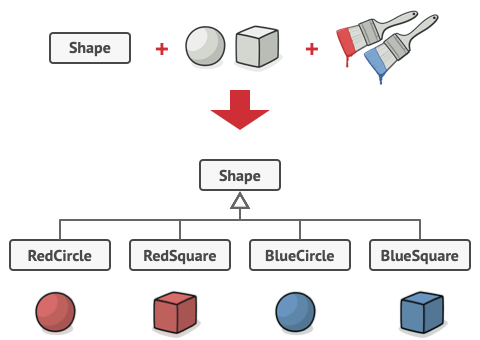


## Solución

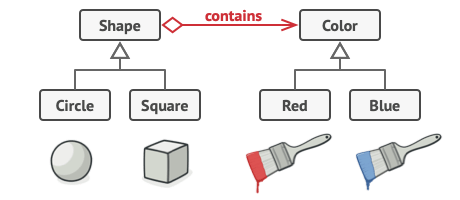


## Problema

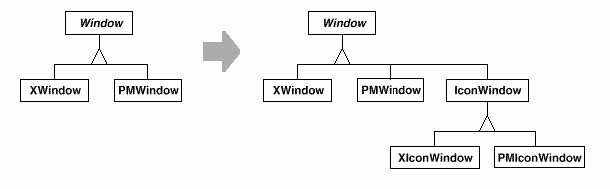


## Solución


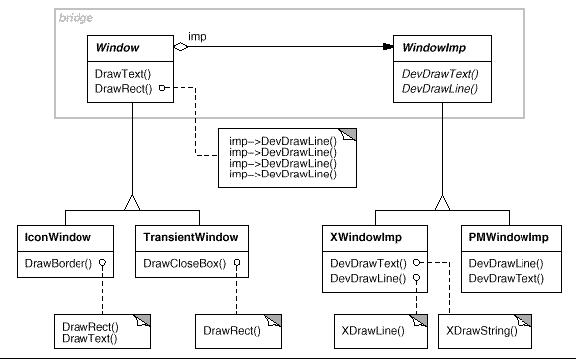


## UML

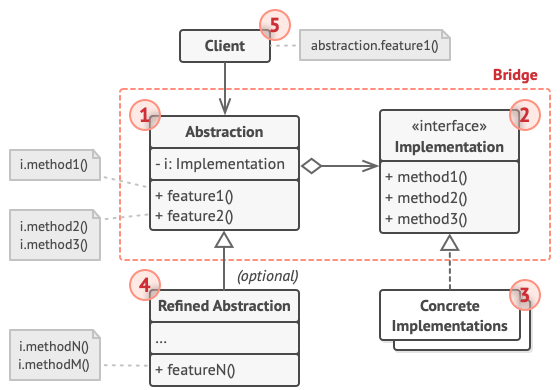


## Demo

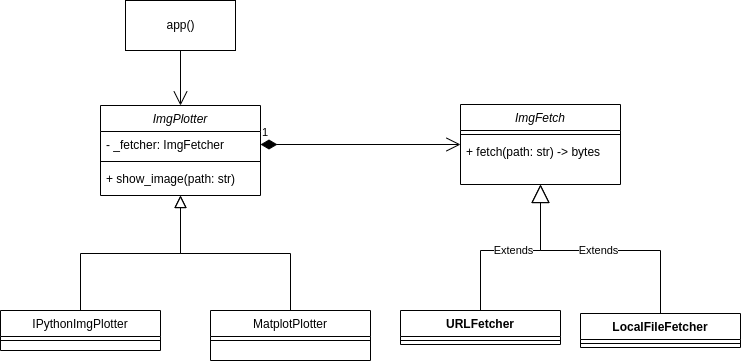


In [1]:
from abc import ABCMeta, abstractmethod

In [2]:
class ImgFetcher(metaclass=ABCMeta):
    @abstractmethod
    def fetch(self, path: str) -> bytes:
        ...

In [3]:
class ImgPlotter(metaclass=ABCMeta):
    def __init__(self, fetcher: ImgFetcher):
        self._fetcher = fetcher

    @abstractmethod
    def show_image(self, path: str) -> None:
        ...

In [4]:
from IPython.display import display, Image as IPImage


class IPythonImgPlotter(ImgPlotter):
    def show_image(self, path: str) -> None:
        img_data = self._fetcher.fetch(path)
        display(IPImage(img_data))

In [5]:
import matplotlib.pyplot as plt
from PIL import Image as PILImage
from io import BytesIO
import numpy as np


class MatplotPlotter(ImgPlotter):
    def show_image(self, path: str) -> None:
        img_data = self._fetcher.fetch(path)
        pil_img = PILImage.open(BytesIO(img_data))
        img_array = np.asarray(pil_img)
        plt.imshow(img_array)
        plt.show()

In [6]:
import urllib

class URLFetcher(ImgFetcher):
    def fetch(self, path: str) -> bytes:
        req = urllib.request.Request(path)
        with urllib.request.urlopen(req) as response:
            if response.code == 200:
                return response.read()
            raise Exception(f'Could not fetch content from {path}')

In [7]:
class LocalFileFetcher(ImgFetcher):
    def fetch(self, path: str) -> str:
        with open(path, mode='br') as fp:
            return fp.read()

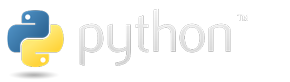

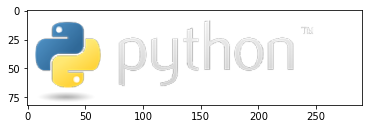

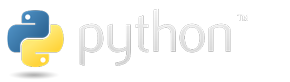

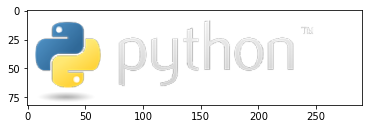

In [8]:
def app(fetcher_type: type[ImgFetcher], img_path: str, plotter_type: type[ImgPlotter]):
    fetcher = fetcher_type()
    plotter = plotter_type(fetcher)
    plotter.show_image(img_path)
    print('======')
for img_path, fetcher_type in [
        ('python-logo.png', LocalFileFetcher),
        ('https://www.python.org/static/img/python-logo.png', URLFetcher)
    ]:
    for img_plotter_type in [IPythonImgPlotter, MatplotPlotter]:
        app(fetcher_type, img_path, img_plotter_type)

## Moraleja

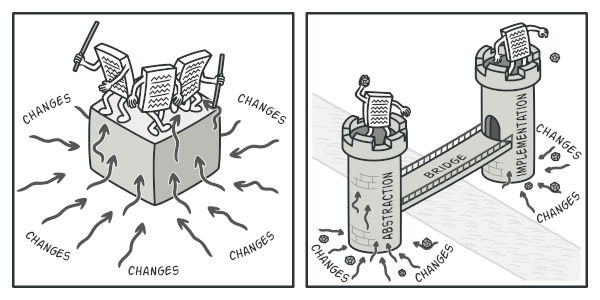


## Bridge Resources

- https://dotnettutorials.net/lesson/bridge-design-pattern/
- https://dotnettutorials.net/lesson/bridge-design-pattern-real-time-example/
- https://stackoverflow.com/questions/464524/what-is-the-difference-between-the-bridge-pattern-and-the-strategy-pattern#464549
- https://bytescrolls.blogspot.com/2009/01/design-patterns-bridge.html
- https://game-engineering.blogspot.com/2008/07/bridge-pattern-vs-strategy-pattern.html
- https://stackoverflow.com/questions/5863530/strategy-vs-bridge-patterns

# Chain of Responsibility Pattern

En ocasiones, no se sabe la mejor forma de manejar un evento que se pasa a un receptor. Para desacoplar el mensajero y el receptor, se pasa el evento por una serie de *handlers* **encadenados** hasta que alguno de ellos procese el mensaje de la mejor forma.

## Problema

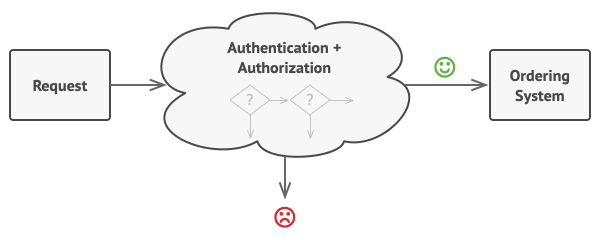

---

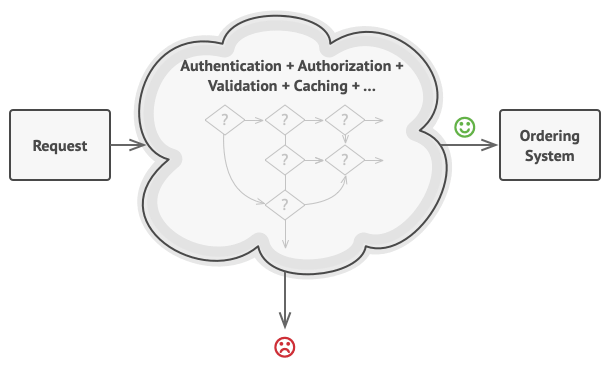

## Solución

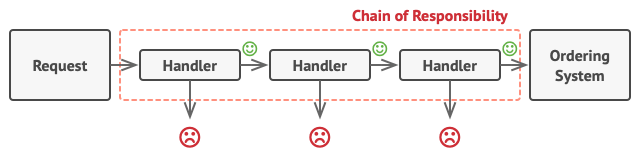


## Ejemplo

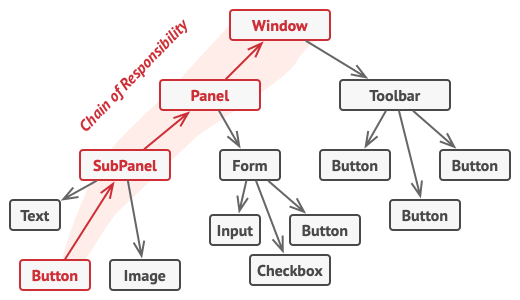


## UML

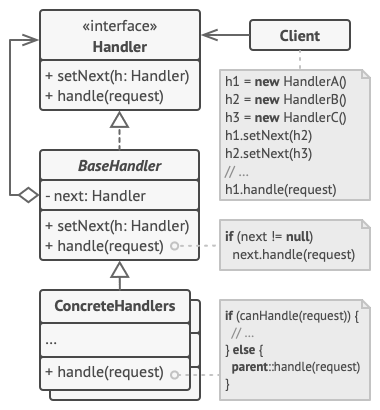


## Demo

> chain_demo/